In [33]:
import pandas as pd
import numpy as np
import sys, os, io
import pstats

In [25]:
raw_filenames = os.listdir('nocalc_profiles')
print(len(raw_filenames))

36


In [67]:
# os.mkdir('temp')
# os.mkdir('temp/nocalc_profiles')
# os.mkdir('temp/isbound_profiles')
# for f in raw_filenames:
#     for d in ['nocalc_profiles/', 'isbound_profiles/']:
#         with open('temp/'+d+f, 'w') as newfile:
#             s = pstats.Stats(d+f, stream=newfile)
#             s.print_stats()
            

['1m', '32', '1.0.']

In [157]:
is_data = {}
no_data = {}
for f in raw_filenames:
    for d in ['nocalc_profiles/', 'isbound_profiles/']:
        dat = pd.read_fwf('temp/'+d+f, skiprows=6, widths=[9,9,9,9,9,100], header=0, index_col=False)
        if 'is' in d:
            is_data[tuple(f.split('stats')[0].split('_')[2:])] = dat
        else:
            no_data[tuple(f.split('stats')[0].split('_')[2:])] = dat            


In [171]:
is_data[('1m', '32', '1.0.')]['filename:lineno(function)'][is_data[('1m', '32', '1.0.')]['filename:lineno(function)'].apply(lambda x: 'do_prediction' in str(x))]

1290    qbic.py:251(do_prediction)
Name: filename:lineno(function), dtype: object

In [267]:
is_data[('1m', '32', '1.0.')].sort_values(by='tottime', ascending=False)

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
1362,24902/248,95 0.0,12 0.0,00 0.0,79 0.0,00 <frozen importlib._bootstrap>:1009(_handle_...
71,90682793/,90682792,8.098,0.000,8.285,0.000 {built-in method builtins.isinstance}
1286,1,9.573,9.573,367.624,367.624,qbic.py:218(postprocess)
1217,24789/166,84 6.5,35 0.0,00 6.5,50 0.0,00 {built-in method numpy.array}
103,90000512,8.133,0.000,8.133,0.000,{method 'get' of 'dict' objects}
1205,27,7.186,0.266,7.186,0.266,{method 'argsort' of 'numpy.ndarray' objects}
1207,13,7.000,0.538,7.000,0.538,{method 'copy' of 'numpy.ndarray' objects}
1151,16441/833,7 0.00,9 0.00,0 0.09,1 0.00,0 /home/ec2-user/miniconda3/lib/python3.7/site...
10,102,554.069,5.432,554.069,5.432,{method 'acquire' of '_thread.lock' objects}
979,6,43.256,7.209,129.718,21.620,{pandas._libs.lib.map_infer_mask}


In [258]:
local_dat = is_data[('2m', '32', '1.0.')]
local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'do_prediction' in str(x))]#['cumtime'].values[0]

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
1018,1,0.003,0.003,438.531,438.531,qbic.py:251(do_prediction)


In [179]:
def extract_do_prediction(local_dat):
    return float(local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'do_prediction' in str(x))]['cumtime'].values[0])

In [180]:
extract_do_prediction(is_data[next(iter(is_data.keys()))])

806.133

In [268]:
vals = {}
for k,v in is_data.items():
    vals[k] = extract_do_prediction(v)
    
for k,v in no_data.items():
    vals[k] = vals[k] - extract_do_prediction(v)
    


In [272]:
df[df['index'] == ('2m', '32', '1.0.')]

,index,0
7,"(2m, 32, 1.0.)",310.535


In [287]:
df = pd.DataFrame.from_dict(vals, orient='index')

df.drop(('2m', '32', '1.0.'), inplace=True, axis=0)
df.drop(('2m', '16', '1.0.'), inplace=True, axis=0)
df.drop(('1m', '32', '1.0.'), inplace=True, axis=0)
df.drop(('2m', '32', '0.1.'), inplace=True, axis=0)

df.reset_index(inplace=True)

df['Millions of Mutations'] = df['index'].apply(lambda x: float(x[0][:-1]))
df['tf_size'] = df['index'].apply(lambda x: int(x[1]))
df['p-Value Threshold'] = df['index'].apply(lambda x: float(x[2][:-1]))

df.drop('index', axis=1, inplace=True)
r = df.columns.values
df.columns = ['CPU Time (s)'] + [r[1], r[2], r[3]]

display(df.shape)
df.head()

(32, 4)

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
0,212.025,2.0,8,1.00
1,18.915,0.5,8,0.01
2,231.496,2.0,32,0.01
3,52.752,0.5,8,1.00
4,89.811,0.5,32,0.10


In [288]:
df[df.tf_size==32]

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
2,231.496,2.0,32,0.0100
4,89.811,0.5,32,0.1000
9,157.647,0.5,32,1.0000
11,67.495,0.5,32,0.0100
14,179.622,1.0,32,0.1000
16,114.714,1.0,32,0.0100
20,44.520,0.5,32,0.0001
21,72.470,1.0,32,0.0001
26,153.924,2.0,32,0.0001


In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

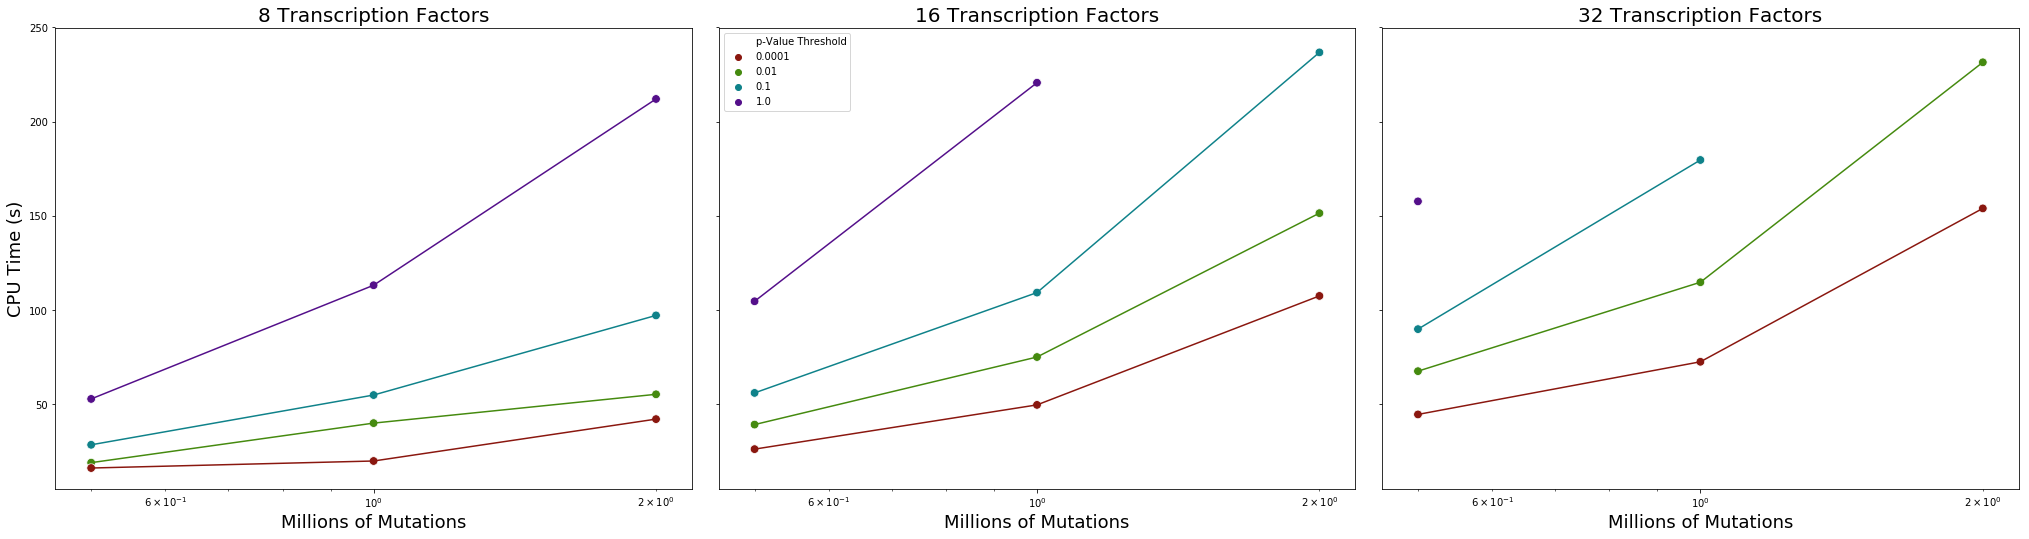

In [312]:
fig, axes = plt.subplots(ncols=3, figsize=(28,7), sharey=True)
plt.tight_layout()

for a in axes:
    a.set(xscale="log")
    
axes[0].set_title('8 Transcription Factors', fontsize=20)
axes[1].set_title('16 Transcription Factors', size=20)
axes[2].set_title('32 Transcription Factors', size=20)

axes[0].set_ylabel('CPU Time (s)', fontsize=18)
axes[0].set_xlabel('Millions of Mutations', fontsize=18)
axes[1].set_xlabel('Millions of Mutations', fontsize=18)
axes[2].set_xlabel('Millions of Mutations', fontsize=18)

sns.scatterplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 8], hue='p-Value Threshold', ax=axes[0], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), s=75, legend=False)
sns.lineplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 8], hue='p-Value Threshold', ax=axes[0], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), legend=False)

sns.scatterplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 16], hue='p-Value Threshold', ax=axes[1], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), s=75)
sns.lineplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 16], hue='p-Value Threshold', ax=axes[1], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), legend=False)

sns.scatterplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 32], hue='p-Value Threshold', ax=axes[2], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), s=75, legend=False)
sns.lineplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 32], hue='p-Value Threshold', ax=axes[2], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), legend=False)


plt.show()